# LGBM & XGBM

## Exploratory Data Analysis (EDA):

In [1]:
import pandas as pd

In [2]:
Data_Train = pd.read_csv('Titanic_train.csv')
Data_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
Data_Test = pd.read_csv('Titanic_test.csv')
Data_Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
Data_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
Data_Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
Data_Test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
Data_Train.shape

(891, 12)

In [15]:
Data_Train.drop(['Cabin','Name'], inplace = True, axis = 1)

In [17]:
Data_Test.drop(['Cabin','Name'], inplace = True, axis = 1)

In [19]:
Data_Train[Data_Train.isnull().any(axis = 1)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,male,NaN,0,0,330877,8.4583,Q
17,18,1,2,male,NaN,0,0,244373,13.0000,S
19,20,1,3,female,NaN,0,0,2649,7.2250,C
26,27,0,3,male,NaN,0,0,2631,7.2250,C
28,29,1,3,female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,male,NaN,0,0,2629,7.2292,C
863,864,0,3,female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,male,NaN,0,0,345777,9.5000,S
878,879,0,3,male,NaN,0,0,349217,7.8958,S


In [21]:
Data_Test[Data_Test.isnull().any(axis = 1)]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
10,902,3,male,NaN,0,0,349220,7.8958,S
22,914,1,female,NaN,0,0,PC 17598,31.6833,S
29,921,3,male,NaN,2,0,2662,21.6792,C
33,925,3,female,NaN,1,2,W./C. 6607,23.4500,S
36,928,3,female,NaN,0,0,342712,8.0500,S
...,...,...,...,...,...,...,...,...,...
408,1300,3,female,NaN,0,0,334915,7.7208,Q
410,1302,3,female,NaN,0,0,365237,7.7500,Q
413,1305,3,male,NaN,0,0,A.5. 3236,8.0500,S
416,1308,3,male,NaN,0,0,359309,8.0500,S


In [23]:
Data_Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
Data_Test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [27]:
Mean = Data_Train['Age'].mean()
Data_Train.loc[:,'Age'] = Data_Train['Age'].fillna(Mean)
Mean

29.69911764705882

In [29]:
Mean = Data_Test['Age'].mean()
Data_Test.loc[:,'Age'] = Data_Test['Age'].fillna(Mean)
Mean

30.272590361445783

In [31]:
Mean = Data_Test['Fare'].mean()
Data_Test.loc[:,'Fare'] = Data_Test['Fare'].fillna(Mean)
Mean

35.627188489208635

<Axes: xlabel='Embarked'>

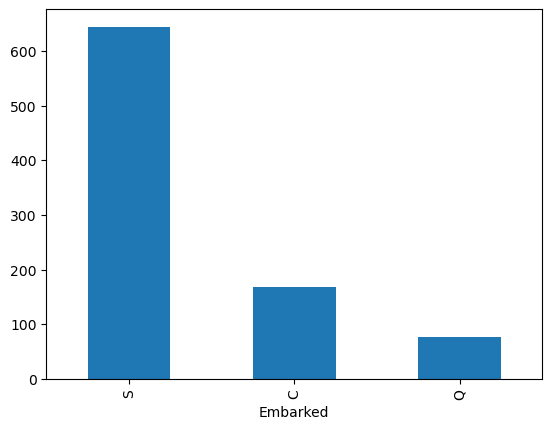

In [33]:
Data_Train.Embarked.value_counts().plot(kind='bar')

In [35]:
Mode = Data_Train.Embarked.mode()[0]
Data_Train.loc[:,'Embarked'] = Data_Train.Embarked.fillna(Mode)
Mode

'S'

<Axes: xlabel='Embarked'>

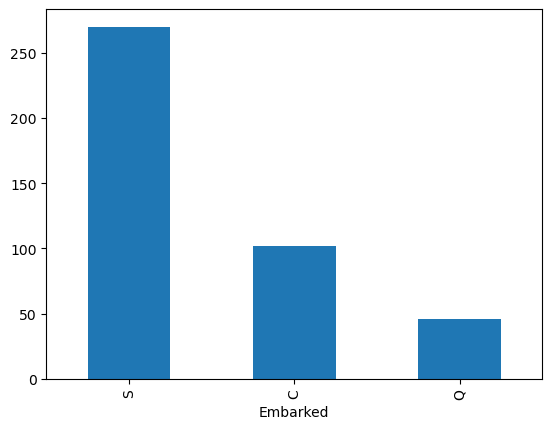

In [37]:
Data_Test.Embarked.value_counts().plot(kind='bar')

In [39]:
Mode = Data_Test.Embarked.mode()[0]
Data_Test.loc[:,'Embarked'] = Data_Train.Embarked.fillna(Mode)
Mode

'S'

In [41]:
Data_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [43]:
Data_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [45]:
Data_Train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [47]:
Data_Test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

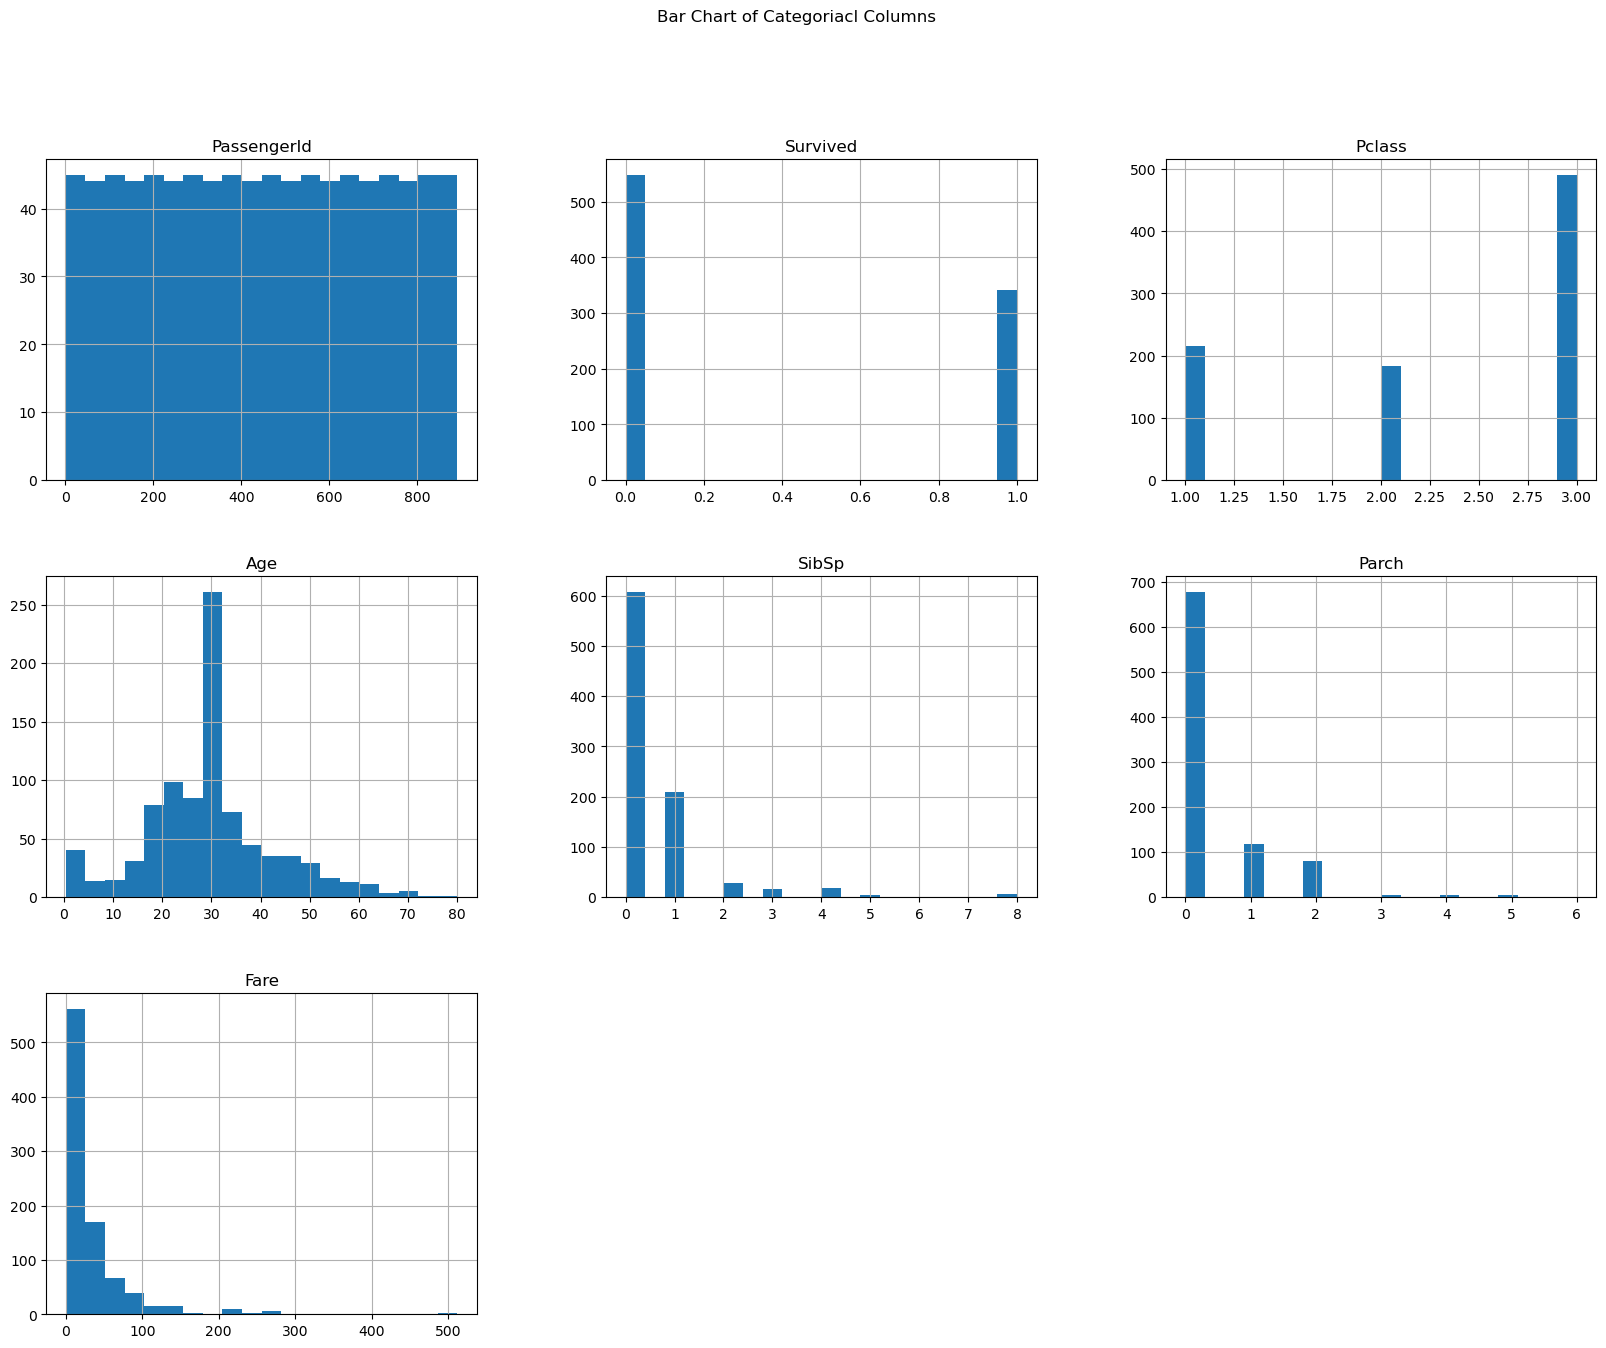

In [49]:
import matplotlib.pyplot as plt
Data_Train.hist(bins = 20, figsize = (20,15))
plt.suptitle('Bar Chart of Categoriacl Columns')
plt.show()

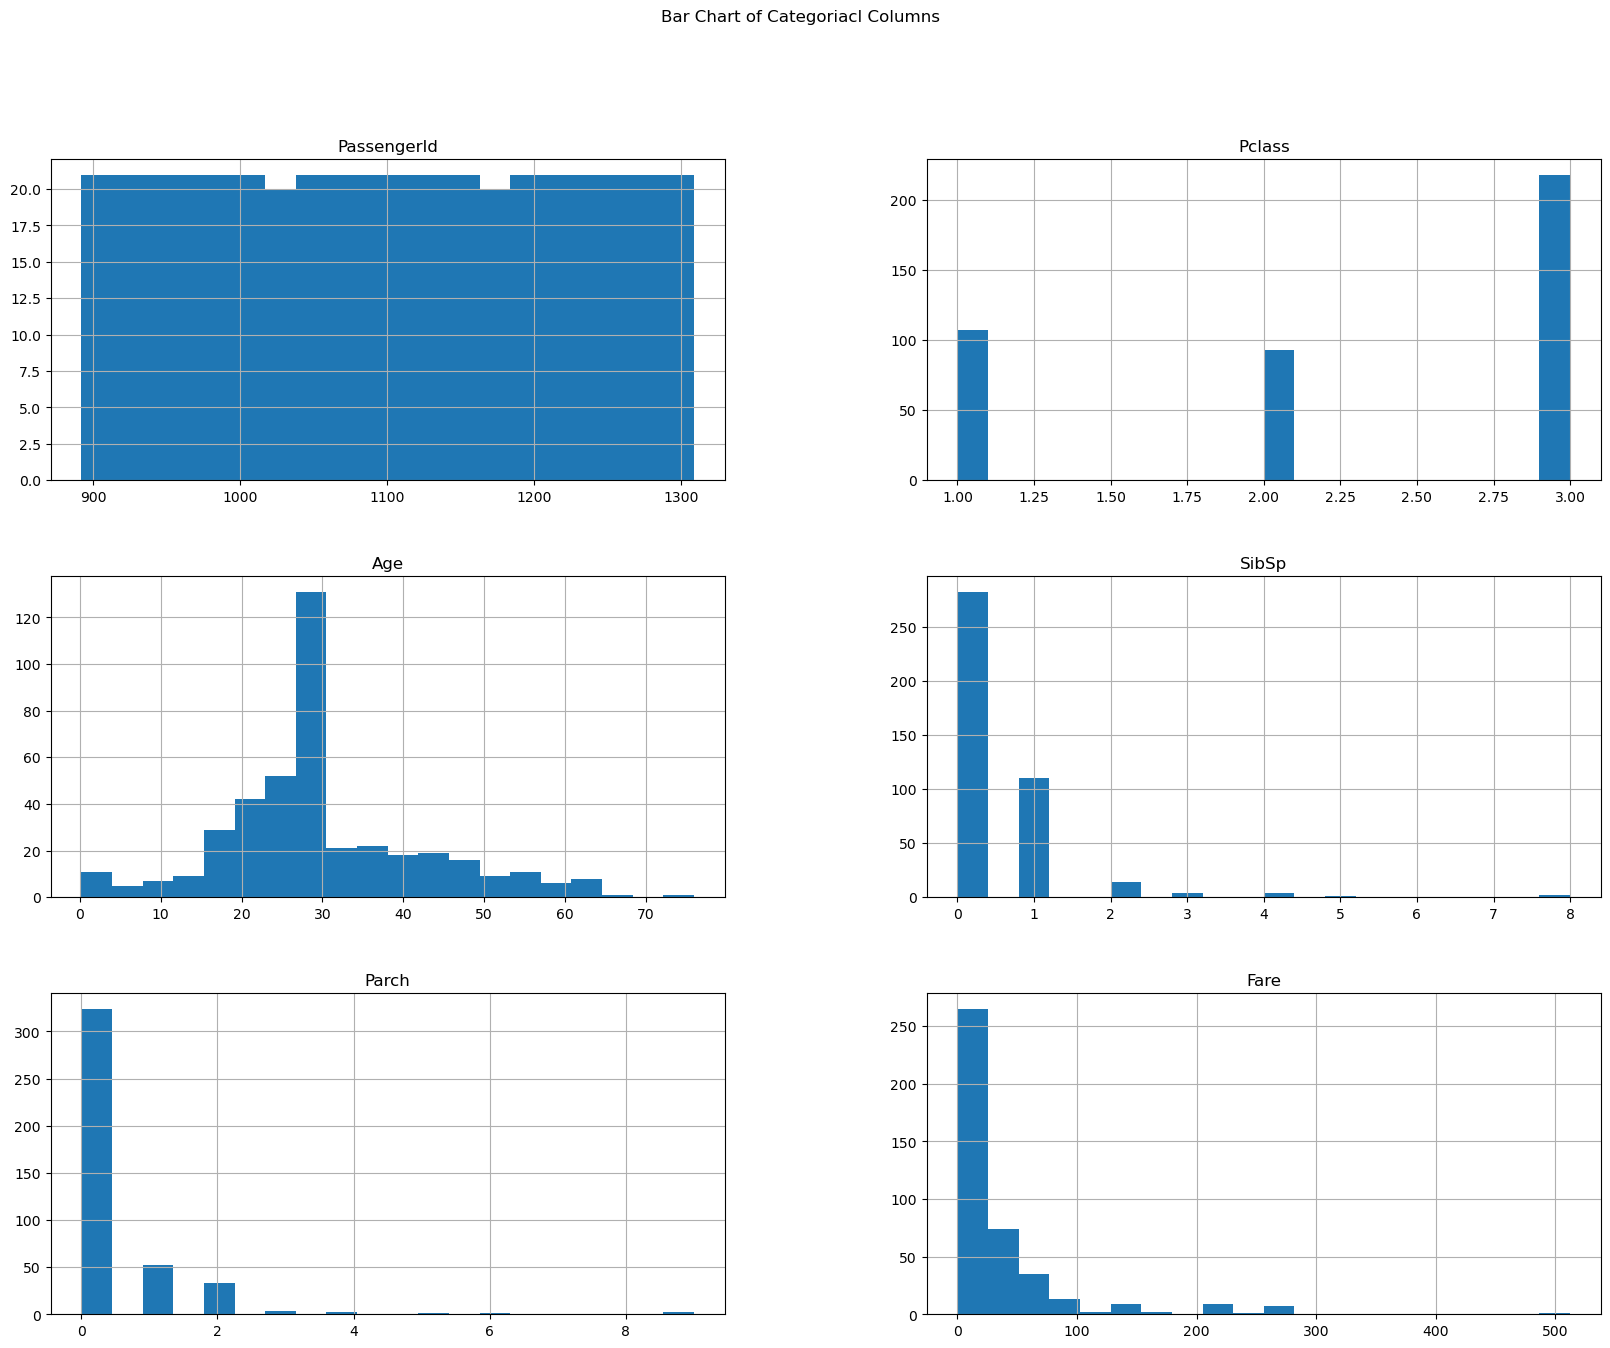

In [51]:
Data_Test.hist(bins = 20, figsize = (20,15))
plt.suptitle('Bar Chart of Categoriacl Columns')
plt.show()

In [53]:
Categorical_columns = ['Survived', 'Pclass', 'SibSp', 'Parch']

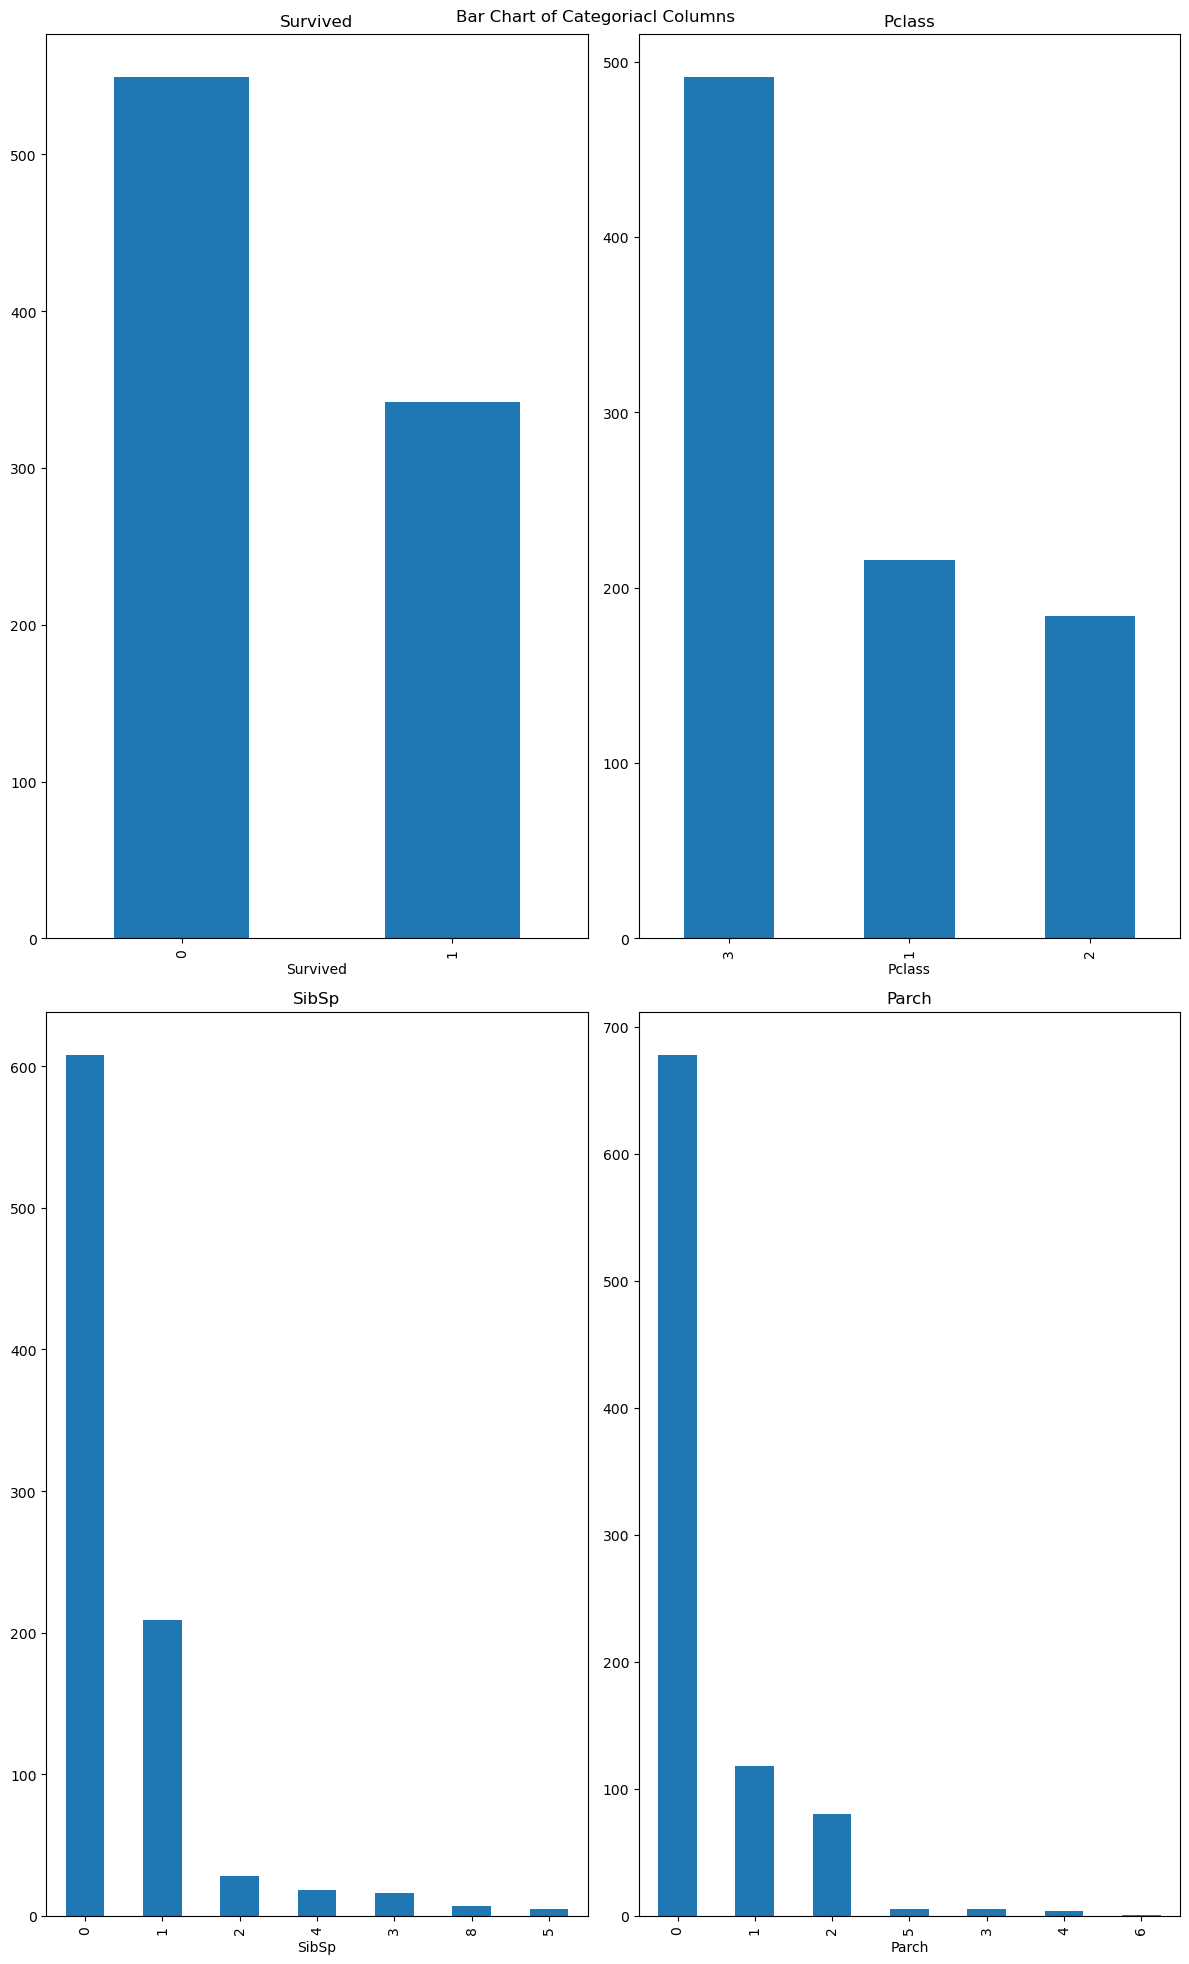

In [55]:
plt.figure(figsize=(12,20))
for i, column in enumerate(Categorical_columns, 1):
    plt.subplot(2,2,i)
    Data_Train[column].value_counts().plot(kind= 'bar')
    plt.title(column)
plt.suptitle('Bar Chart of Categoriacl Columns')
plt.tight_layout()
plt.show()

In [57]:
Categorical_columns1 = ['Pclass', 'SibSp', 'Parch']

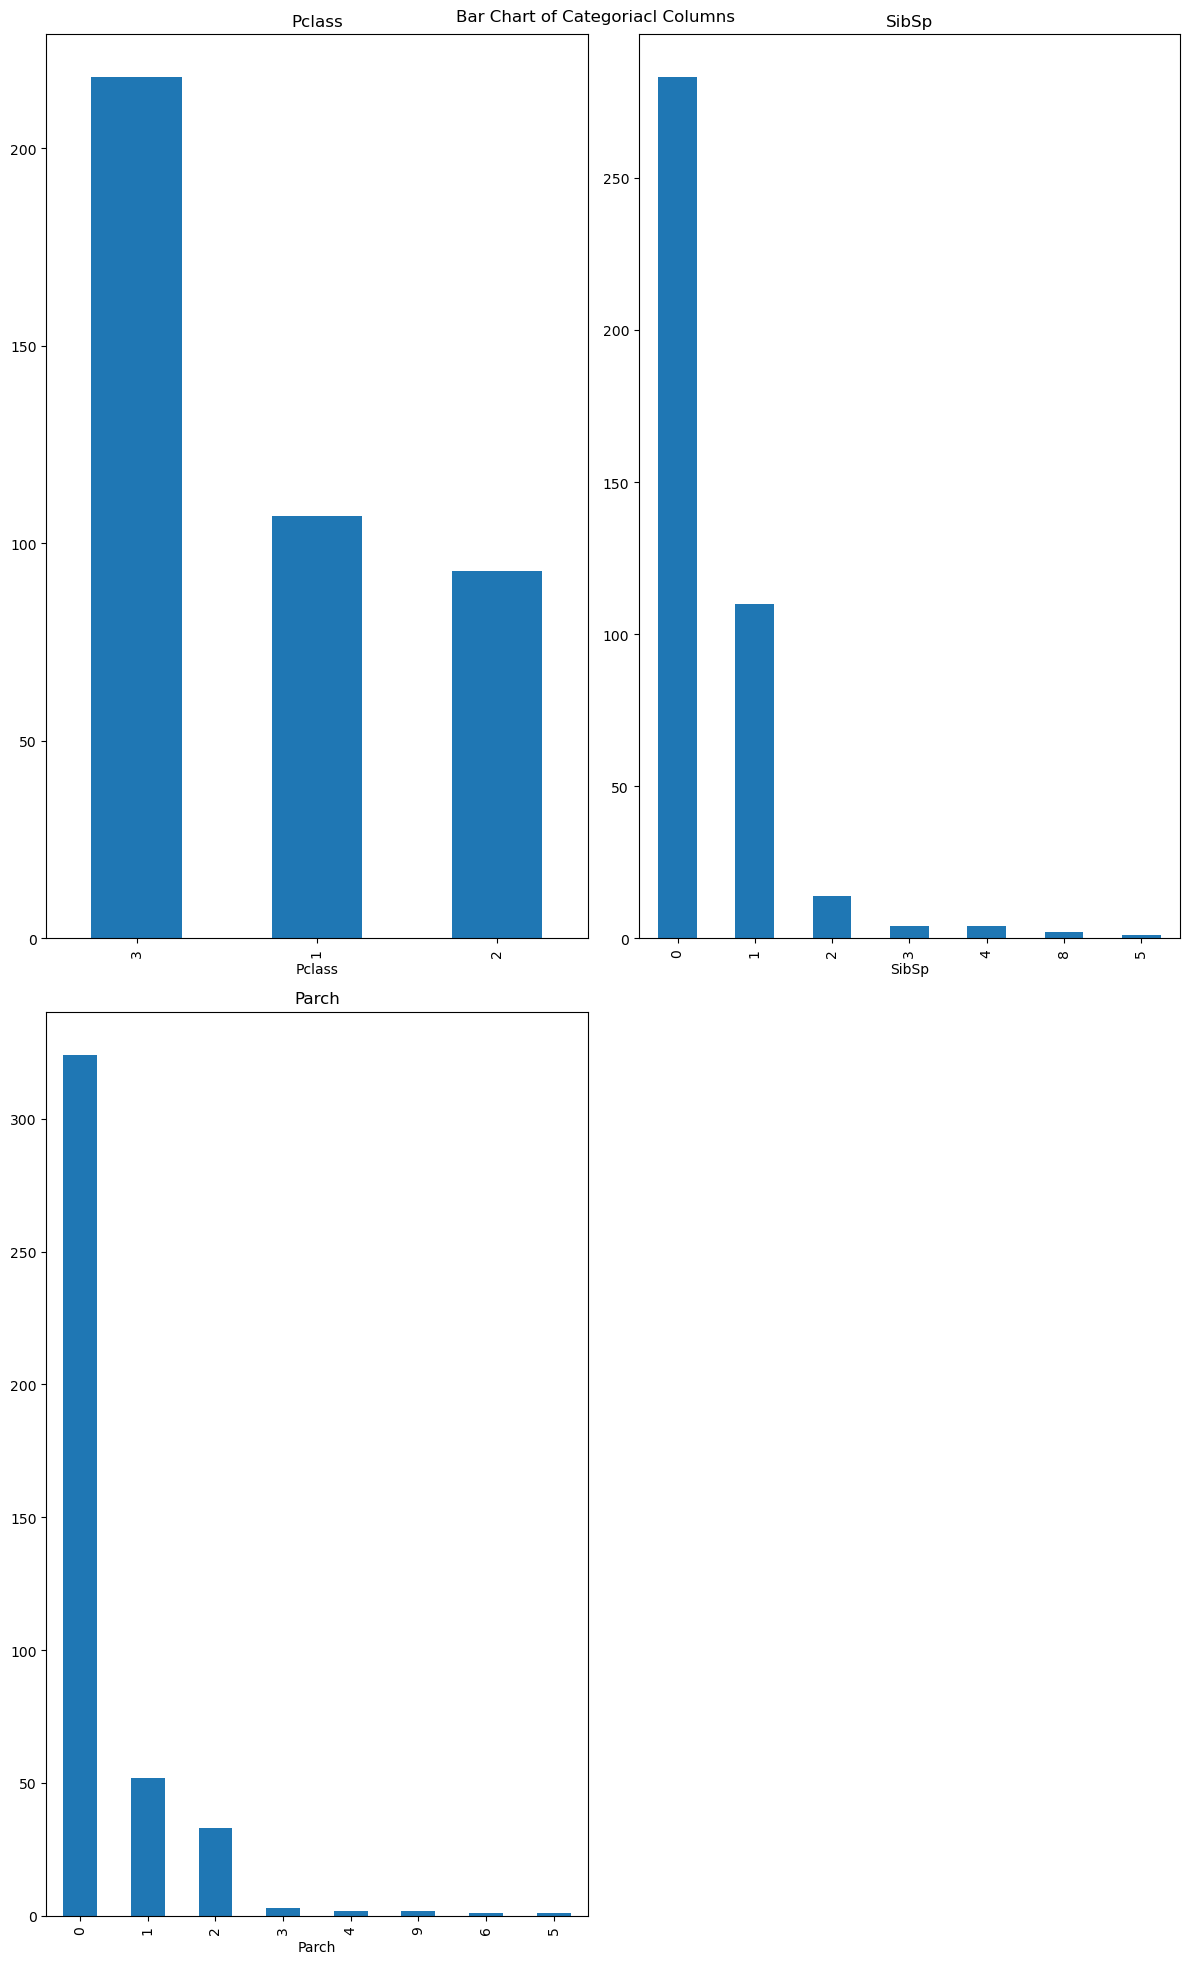

In [59]:
plt.figure(figsize=(12,20))
for i, column in enumerate(Categorical_columns1, 1):
    plt.subplot(2,2,i)
    Data_Test[column].value_counts().plot(kind= 'bar')
    plt.title(column)
plt.suptitle('Bar Chart of Categoriacl Columns')
plt.tight_layout()
plt.show()

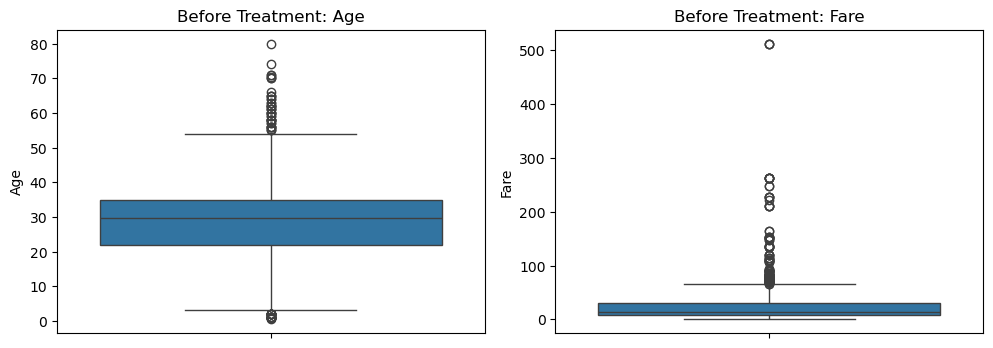

In [61]:
import numpy as np
import seaborn as sns
# Select numerical columns
numerical_cols = ['Age','Fare']

# Function to detect and treat outliers using IQR
def treat_outliers_iqr(Data_Train, column):
    Q1 = Data_Train[column].quantile(0.25)
    Q3 = Data_Train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    Data_Train[column] = np.where(Data_Train[column] < lower_bound, lower_bound, Data_Train[column])
    Data_Train[column] = np.where(Data_Train[column] > upper_bound, upper_bound, Data_Train[column])
    return Data_Train

# Visualize outliers before treatment
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=Data_Train[col])
    plt.title(f'Before Treatment: {col}')
plt.tight_layout()
plt.show()


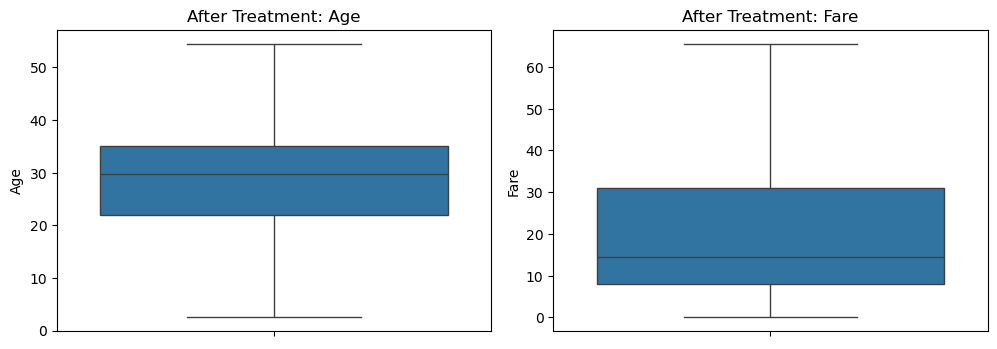

In [63]:
#Treat outliers for all numerical columns
for col in numerical_cols:
    Data_Train = treat_outliers_iqr(Data_Train, col)

# Visualize outliers after treatment
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=Data_Train[col])
    plt.title(f'After Treatment: {col}')
plt.tight_layout()
plt.show()


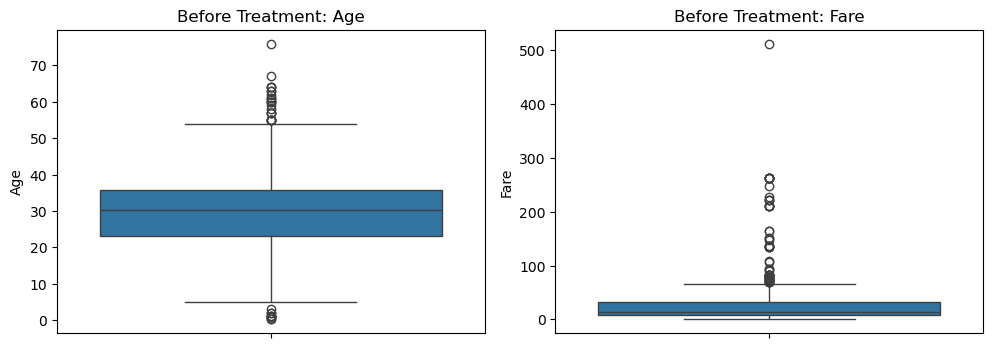

In [65]:
import numpy as np
# Select numerical columns
numerical_cols = ['Age','Fare']

# Function to detect and treat outliers using IQR
def treat_outliers_iqr(Data_Test, column):
    Q1 = Data_Test[column].quantile(0.25)
    Q3 = Data_Test[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    Data_Test[column] = np.where(Data_Test[column] < lower_bound, lower_bound, Data_Test[column])
    Data_Test[column] = np.where(Data_Test[column] > upper_bound, upper_bound, Data_Test[column])
    return Data_Test

# Visualize outliers before treatment
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=Data_Test[col])
    plt.title(f'Before Treatment: {col}')
plt.tight_layout()
plt.show()


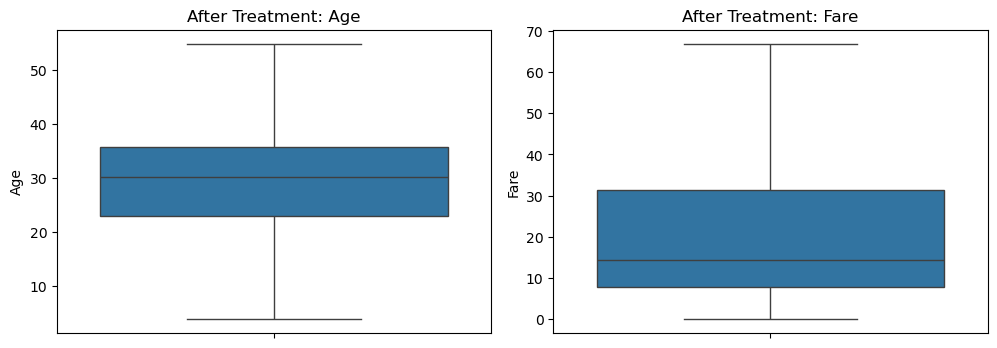

In [67]:
#Treat outliers for all numerical columns
for col in numerical_cols:
    Data_Test = treat_outliers_iqr(Data_Test, col)

# Visualize outliers after treatment
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=Data_Test[col])
    plt.title(f'After Treatment: {col}')
plt.tight_layout()
plt.show()


In [69]:
Data_Train1 = Data_Train.select_dtypes('number')
Data_Train1.corr(method = ('pearson'))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035533,-0.057527,-0.001652,0.003243
Survived,-0.005007,1.000000,-0.338481,-0.065857,-0.035322,0.081629,0.317430
Pclass,-0.035144,-0.338481,1.000000,-0.330962,0.083081,0.018443,-0.715300
Age,0.035533,-0.065857,-0.330962,1.000000,-0.238735,-0.186087,0.137498
SibSp,-0.057527,-0.035322,0.083081,-0.238735,1.000000,0.414838,0.332021
Parch,-0.001652,0.081629,0.018443,-0.186087,0.414838,1.000000,0.292616
Fare,0.003243,0.317430,-0.715300,0.137498,0.332021,0.292616,1.000000


<Axes: >

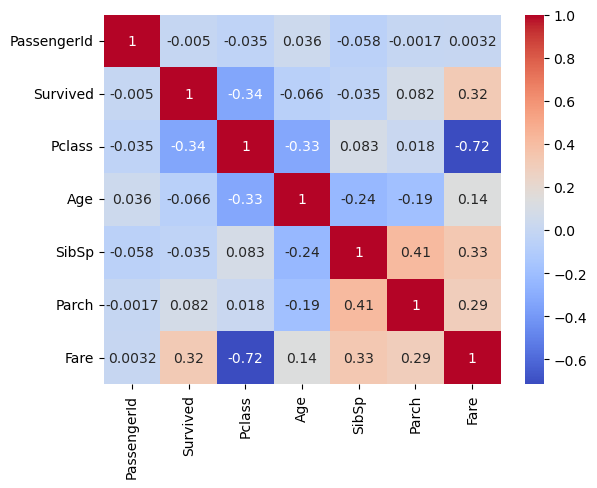

In [71]:
sns.heatmap(Data_Train1.corr(),annot =True,cmap="coolwarm")

In [73]:
Data_Test1 = Data_Test.select_dtypes('number')
Data_Test1.corr(method = ('pearson'))

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.018131,0.003818,0.043080,0.048692
Pclass,-0.026751,1.000000,-0.441413,0.001087,0.018721,-0.746547
Age,-0.018131,-0.441413,1.000000,-0.092328,-0.046323,0.330804
SibSp,0.003818,0.001087,-0.092328,1.000000,0.306895,0.302179
Parch,0.043080,0.018721,-0.046323,0.306895,1.000000,0.314485
Fare,0.048692,-0.746547,0.330804,0.302179,0.314485,1.000000


<Axes: >

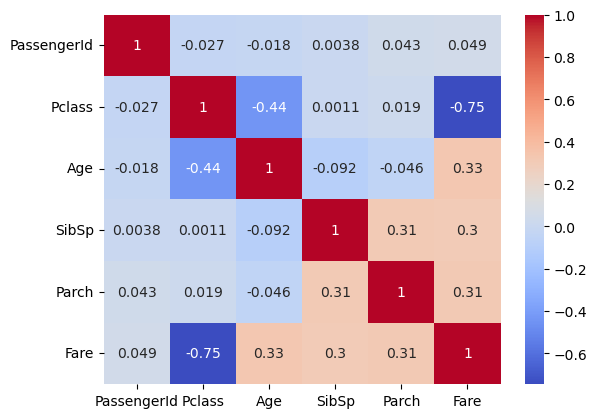

In [75]:
sns.heatmap(Data_Test1.corr(),annot =True,cmap="coolwarm")

In [77]:
Data_Train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,65.6344,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [79]:
Data_Test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,male,34.500,0,0,330911,7.8292,S
1,893,3,female,47.000,1,0,363272,7.0000,C
2,894,2,male,54.875,0,0,240276,9.6875,S
3,895,3,male,27.000,0,0,315154,8.6625,S
4,896,3,female,22.000,1,1,3101298,12.2875,S


## Data Preprocessing:

In [82]:
from sklearn.preprocessing import LabelEncoder
Categorical = Data_Train.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in Categorical:
    Data_Train[col] = le.fit_transform(Data_Train[col])
Data_Train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,2
1,2,1,1,0,38.0,1,0,596,65.6344,0
2,3,1,3,0,26.0,0,0,669,7.9250,2
3,4,1,1,0,35.0,1,0,49,53.1000,2
4,5,0,3,1,35.0,0,0,472,8.0500,2


In [84]:
from sklearn.preprocessing import LabelEncoder
Categorical = Data_Test.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in Categorical:
    Data_Test[col] = le.fit_transform(Data_Test[col])
Data_Test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,1,34.500,0,0,152,7.8292,2
1,893,3,0,47.000,1,0,221,7.0000,0
2,894,2,1,54.875,0,0,73,9.6875,2
3,895,3,1,27.000,0,0,147,8.6625,2
4,896,3,0,22.000,1,1,138,12.2875,2


In [86]:
Data_Train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Embarked         int32
dtype: object

In [88]:
Data_Test.dtypes

PassengerId      int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Embarked         int32
dtype: object

In [90]:
X_train = Data_Train.drop('Survived', axis = 1)
y_train = Data_Train['Survived']
X_test = Data_Test

# Building Predictive Models:

In [93]:
!pip install lightgbm

In [94]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report

In [97]:

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [99]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [101]:
y_pred = model.predict(X_test)

In [103]:
print('accuracy:' , accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred,average = 'weighted'))
print('F1 Score:' , f1_score(y_test, y_pred, average='weighted'))
print('Confusion Matrix:\n' ,confusion_matrix(y_test, y_pred))
print('Classification Report:' , classification_report(y_test, y_pred))

accuracy: 0.7821229050279329
Precision: 0.7808274633632905
Recall: 0.7821229050279329
F1 Score: 0.7808473194987422
Confusion Matrix:
 [[88 17]
 [22 52]]
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [105]:
# XGBM

In [107]:
import lightgbm as lgb
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [109]:
y_pred1 = lgbm_model.predict(X_test)

In [111]:
 df = print('accuracy:' , accuracy_score(y_test, y_pred1))
print('Precision:', precision_score(y_test, y_pred1, average='weighted'))
print('Recall:', recall_score(y_test, y_pred1,average = 'weighted'))
print('F1 Score:' , f1_score(y_test, y_pred1, average='weighted'))
print('Confusion Matrix:\n' ,confusion_matrix(y_test, y_pred1))
print('Classification Report:' , classification_report(y_test, y_pred1))

accuracy: 0.7988826815642458
Precision: 0.7978301995719018
Recall: 0.7988826815642458
F1 Score: 0.7974270202218899
Confusion Matrix:
 [[90 15]
 [21 53]]
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# Comparative Analysis:

In [114]:
XGBM = ( 0.7821, 0.7808, 0.7821, 0.7808)
LGBM = (0.7988, 0.7978, 0.7988, 0.7974)
print(XGBM)
print(LGBM)

(0.7821, 0.7808, 0.7821, 0.7808)
(0.7988, 0.7978, 0.7988, 0.7974)


In [116]:
metrics_df = pd.DataFrame({
    'Model': ['XGBM', 'LGBM'],
    'Accuracy': [XGBM[0], LGBM[0]],
    'Precision': [XGBM[1], LGBM[1]],
    'Recall': [XGBM[2], LGBM[2]],
    'F1-Score': [XGBM[3], LGBM[3]]
})

print(metrics_df)

  Model  Accuracy  Precision  Recall  F1-Score
0  XGBM    0.7821     0.7808  0.7821    0.7808
1  LGBM    0.7988     0.7978  0.7988    0.7974


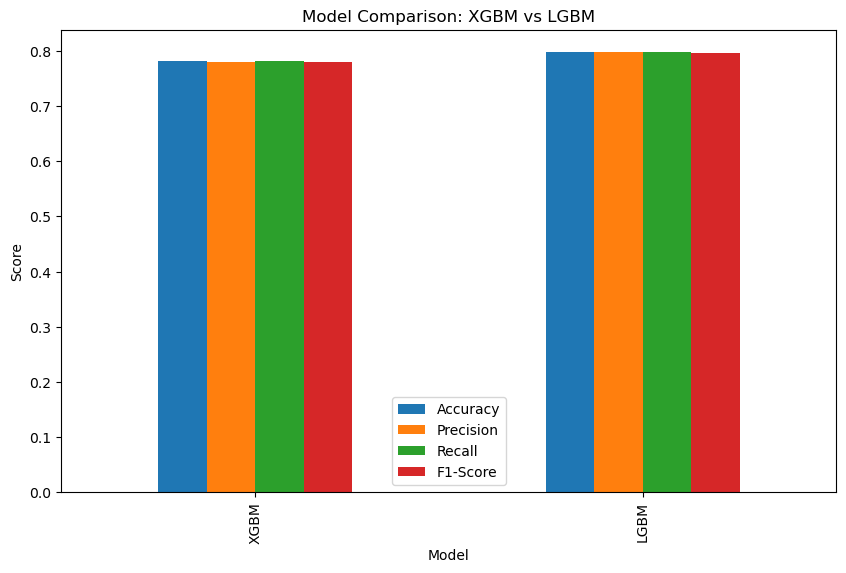

In [118]:
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison: XGBM vs LGBM')
plt.ylabel('Score')
plt.show()

# Cross-Validation and Hyperparameter Tuning

In [150]:
from sklearn.model_selection import cross_val_score

In [152]:
Xgbm_cv = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print('Xgbm_cv:', Xgbm_cv)
print('Xgbm_mean:',Xgbm_cv.mean())

Xgbm_cv: [0.83216783 0.8041958  0.8028169  0.8028169  0.85915493]
Xgbm_mean: 0.8202304737516005


In [154]:
lgbm_cv = cross_val_score(lgbm_model, X_train, y_train, cv=5, scoring='accuracy')
print('lgbm_cv:', lgbm_cv)
print('lgbm_mean:',lgbm_cv.mean())

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 530
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [129]:
# Hyperparameter Tuning

In [156]:
from sklearn.model_selection import GridSearchCV
xgbm_param = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [158]:
xgbm_grid_search = GridSearchCV(estimator=model, param_grid=xgbm_param, cv=5, scoring='accuracy')
xgbm_grid_search.fit(X_train, y_train)
print("Best LightGBM Parameters:", xgbm_grid_search.best_params_)

Best LightGBM Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}


In [159]:
from sklearn.model_selection import GridSearchCV
lgbm_param = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [160]:
lgbm_grid_search = GridSearchCV(estimator=lgbm_model, param_grid=lgbm_param, cv=5, scoring='accuracy')
lgbm_grid_search.fit(X_train, y_train)
print("Best LightGBM Parameters:", lgbm_grid_search.best_params_)

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 530
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [165]:
from my_module import evaluate_model
best_Xgbm_model = xgbm_grid_search.best_estimator_
Xgbm_tuned = evaluate_model(best_Xgbm_model, X_test,y_test)
print("Tuned Light:" , Xgbm_tuned)


ModuleNotFoundError: No module named 'my_module'

In [ ]:
best_lgbm_model = lgbm_grid_search.best_estimator_
lgbm_tuned = evaluate_model(best_lgbm_model, X_test,y_test)
print("Tuned Light:" , lgbm_tuned)

In [ ]:
'''def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    return accuracy, precision, recall, f1

lgbm_metrics = evaluate_model(lgbm_model, X_val_split, y_val_split)
xgb_metrics = evaluate_model(xgb_model, X_val_split, y_val_split)

print("LightGBM Metrics:", lgbm_metrics)
print("XGBoost Metrics:", xgb_metrics)''' 